# Part 1: Data Cleaning
Cleaning of the data

In [437]:
import pandas as pd
import numpy as np
import datetime

Since the last_paymnt_amnt has mixed dtypes, convert it to float so that the load is faster

In [438]:
df = pd.read_csv('loan.zip', dtype={'last_pymnt_amnt':float}, na_values=['NA','NAN'])

C:\Users\chandrashekarap\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Treat missing values

Check the percentage of missing values for each column

In [425]:
round(100*(df.isnull().sum()/len(df.index)), 2)
#This series was saved as csv and analysed for all the columns
#mths_since_last_record, next_pymnt_d exclude these?

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

Drop all the columns with NaN values > 93%. We dont want to exclude mths_since_last_record, since its an important factor

In [426]:
df = df.loc[:, df.isin([' ','NULL', 'NA', 'NaN', np.nan,'']).mean() < 0.93]
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

Drop duplicates if any

In [427]:
df.drop_duplicates()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

Treat date time for the last payment date and earliest_cr_line columns

In [428]:
def convertToDatetime(x):
    if((x == 'NaN') | (x == 'nan')):
        return 'nan' 
    else:
        return '01-' + x
        
df['last_pymnt_d'] = df['last_pymnt_d'].apply(lambda x: convertToDatetime(str(x)))
df['last_pymnt_d'] = df['last_pymnt_d'].apply(lambda x: datetime.datetime.strptime(x,'%d-%b-%y').strftime('%Y%m%d') if(x != 'nan') else x)
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])

In [429]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: '01-' + x if(x != 'nan') else x)
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: datetime.datetime.strptime(x,'%d-%b-%y').strftime('%Y%m%d') if(x != 'nan') else x)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [430]:
df['issue_d'] = df['issue_d'].apply(lambda x: '01-' + x if(x != 'nan') else x)
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.datetime.strptime(x,'%d-%b-%y').strftime('%Y%m%d') if(x != 'nan') else x)
df['issue_d'] = pd.to_datetime(df['issue_d'])

- Drop emp_title column as it does not hold any significance. Drop pymnt_plan as it has only 'n' as value, which would not hold any significance.
- Drop initial_list_status as the only value it has is 'f'.
- Drop 'collections_12_mths_ex_med' as the only values it has got is '0' or NA
- Drop 'policy_code' the only value it has got is '1'
- Drop 'application_type' as the only value it has got is 'Individual'
- Drop 'annual_inc_joint' as the only value it has got is 'NA'
- Drop 'dti_joint' as the only value it has got is 'NA'
- Drop 'verification_status_joint' NA
- Drop acc_now_delinq as the only value it has got is 0
- Drop tot_coll_amt as the only value it has got is 0 
- Drop tot_cur_bal as the only value it has got is NA
- Drop open_acc_6m as the only value it has got is NA
- Drop chargeoff_within_12_mths as the only value it has got is NA/0
- Drop delinq_amnt as the only value it has got is NA/0

In [431]:
df.drop(['emp_title', 'pymnt_plan', 'initial_list_status','collections_12_mths_ex_med', 'policy_code', 'application_type',
         'acc_now_delinq', 
         'chargeoff_within_12_mths', 'delinq_amnt'
        ], axis=1)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

Columns of interest, pub_rec_bankruptcies, tax_lien, dti, delinq_amnt, delinq_2yrs, chargeoff_within_12_mths, 
collection_recovery_fee, fico_range_low, fico_range_high, acc_now_delinq, home_ownership, inq_last_12m, inq_last_6mths, 
loan_amnt, loan_status, max_bal_bc, revol_util, revol_bal, total_acc
mths_since_last_record, verification_status

Revolving utilization, also known as your “debt-to-limit ratio” or “credit utilization,”

# Standardize values
# Categorical data
# Discrete variables
# Continous variables, Bin
# Correlations
# Map
# Derived Metrics
# Outlier treatment
# Graphs and plots

In [432]:
df['funded_amnt_inv'].describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

## Remove wrong funded_amnt_inv as outliers

### Treat the employee year column, emp_length as derived metric

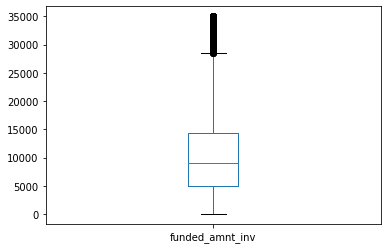

In [433]:
df.boxplot( column =['funded_amnt_inv'], grid = False) 

### Remove the outliers and discrepancies in funded_amnt_inv column

In [444]:
df = df[(df['funded_amnt_inv'] == 0) | (df['funded_amnt_inv'] < 2*df['installment'])]
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
17818  709526     902159      12000        12000       400.000000   36 months   
36496  408383     447563      10000        10000       625.000000   36 months   
36577  402415     447072      18000        18000       900.000000   36 months   
36815  395081     434271      10000         7500       500.000000   36 months   
36901  392430     429350      25000        25000      1400.000000   36 months   
36910  393690     431912      20000        20000      1150.000000   36 months   
37029  390401     424121      12250        12250       524.994654   36 months   
37434  380974     408931      16000        16000      1038.112632   36 months   
37908  369544     379580      18800        18800      1125.000000   36 months   
38388  357380     363377       1775         1775         0.000000   36 months   
38390  357184     363021       7500         7500       191.080000   36 months   
38392  357157     362967       7500         7500         0.000000   36 months   
38393  357066     362786       4000         4000         0.000000   36 months   
38395  356756     359455       1000         1000         0.004354   36 months   
38396  356699     362127       3200         2100         0.000000   36 months   
38397  356601     361999       7500         7500         0.000000   36 months   
38399  356549     361907       7000         6100         0.000000   36 months   
38400  356546     361901       7500         7500         0.006686   36 months   
38403  356431     361667       6000         5250         0.005098   36 months   
38406  356340     361559       7500         4750         0.000000   36 months   
38420  355666     360502       5600         4300         0.000000   36 months   
38421  355587     360361       7500         4800         0.000000   36 months   
38422  355485     360201       6000         5100         0.002373   36 months   
38423  355467     360172       7500         5550         0.000000   36 months   
38424  355476     360189       5000         4250         0.002252   36 months   
38425  355011     359484       6000         3100         0.000000   36 months   
38426  355405     360126       6400         4500         0.000000   36 months   
38427  355380     360079       7500         5575         0.000000   36 months   
38429  355228     354554       7500         6650         0.000655   36 months   
38431  354986     359435       7000         7000       224.993468   36 months   
...       ...        ...        ...          ...              ...         ...   
39540  166534     163941      16000        16000       185.002700   36 months   
39542  164792     153157      17600        17600      1000.000000   36 months   
39543  164741     164738      16000        16000       536.000000   36 months   
39554  157169     157162      25000        25000       499.999401   36 months   
39555  156868     156838      24750        24750      1150.000000   36 months   
39564  153434     153428      12000        12000       724.560000   36 months   
39565  153235     147832      18000        18000       565.290000   36 months   
39570  151621     151597      18000        18000       350.000000   36 months   
39572  151587     151580      19950        19950       675.000000   36 months   
39586  143566     143201      12375        12375       275.000000   36 months   
39618  135201     135198      10000        10000       200.000000   36 months   
39631  131223     129367      20000        20000      1200.000000   36 months   
39634  130512     130019       7250         7250       425.000000   36 months   
39635  129745     129716      10000        10000       275.000000   36 months   
39636  128881     128775       7000         7000        75.000000   36 months   
39638  127830     127824       8000         8000       150.000000   36 months   
39639  127531     127525      17000        17000       300.000000   36 months   
39653  123228     120995      20000       

### Treat the emp_length column

In [445]:
df['emp_length'] = df['emp_length'].str.extract('(\d)')

In [446]:
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
17818  709526     902159      12000        12000       400.000000   36 months   
36496  408383     447563      10000        10000       625.000000   36 months   
36577  402415     447072      18000        18000       900.000000   36 months   
36815  395081     434271      10000         7500       500.000000   36 months   
36901  392430     429350      25000        25000      1400.000000   36 months   
36910  393690     431912      20000        20000      1150.000000   36 months   
37029  390401     424121      12250        12250       524.994654   36 months   
37434  380974     408931      16000        16000      1038.112632   36 months   
37908  369544     379580      18800        18800      1125.000000   36 months   
38388  357380     363377       1775         1775         0.000000   36 months   
38390  357184     363021       7500         7500       191.080000   36 months   
38392  357157     362967       7500         7500         0.000000   36 months   
38393  357066     362786       4000         4000         0.000000   36 months   
38395  356756     359455       1000         1000         0.004354   36 months   
38396  356699     362127       3200         2100         0.000000   36 months   
38397  356601     361999       7500         7500         0.000000   36 months   
38399  356549     361907       7000         6100         0.000000   36 months   
38400  356546     361901       7500         7500         0.006686   36 months   
38403  356431     361667       6000         5250         0.005098   36 months   
38406  356340     361559       7500         4750         0.000000   36 months   
38420  355666     360502       5600         4300         0.000000   36 months   
38421  355587     360361       7500         4800         0.000000   36 months   
38422  355485     360201       6000         5100         0.002373   36 months   
38423  355467     360172       7500         5550         0.000000   36 months   
38424  355476     360189       5000         4250         0.002252   36 months   
38425  355011     359484       6000         3100         0.000000   36 months   
38426  355405     360126       6400         4500         0.000000   36 months   
38427  355380     360079       7500         5575         0.000000   36 months   
38429  355228     354554       7500         6650         0.000655   36 months   
38431  354986     359435       7000         7000       224.993468   36 months   
...       ...        ...        ...          ...              ...         ...   
39540  166534     163941      16000        16000       185.002700   36 months   
39542  164792     153157      17600        17600      1000.000000   36 months   
39543  164741     164738      16000        16000       536.000000   36 months   
39554  157169     157162      25000        25000       499.999401   36 months   
39555  156868     156838      24750        24750      1150.000000   36 months   
39564  153434     153428      12000        12000       724.560000   36 months   
39565  153235     147832      18000        18000       565.290000   36 months   
39570  151621     151597      18000        18000       350.000000   36 months   
39572  151587     151580      19950        19950       675.000000   36 months   
39586  143566     143201      12375        12375       275.000000   36 months   
39618  135201     135198      10000        10000       200.000000   36 months   
39631  131223     129367      20000        20000      1200.000000   36 months   
39634  130512     130019       7250         7250       425.000000   36 months   
39635  129745     129716      10000        10000       275.000000   36 months   
39636  128881     128775       7000         7000        75.000000   36 months   
39638  127830     127824       8000         8000       150.000000   36 months   
39639  127531     127525      17000        17000       300.000000   36 months   
39653  123228     120995      20000       

### Some of the categorical variables are home_ownership, verification_status, emp_length